In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
Stock = pd.read_csv('E:/aapl.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close/Last':'Close'})
df_Stock.head()

,Close,Volume,Open,High,Low
Date,,,,,
04/16/2024,169.38,73711240,171.75,173.76,168.27
04/15/2024,172.69,73531770,175.36,176.63,172.50
04/12/2024,176.55,101670900,174.26,178.36,174.21
04/11/2024,175.04,91070280,168.34,175.46,168.16
04/10/2024,167.78,49709340,168.80,169.09,167.11


In [3]:
df_Stock.tail(5)

,Close,Volume,Open,High,Low
Date,,,,,
04/24/2014,20.2775,758353097,20.2932,20.3572,20.0261
04/23/2014,18.7411,373894210,18.8950,18.9689,18.7304
04/22/2014,18.9893,202430847,18.8682,18.9938,18.8036
04/21/2014,18.9704,182185847,18.7622,19.0050,18.7129
04/17/2014,18.7479,283914286,18.5714,18.8486,18.5429


In [4]:
df_Stock.shape

(2516, 5)

In [5]:
df_Stock.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

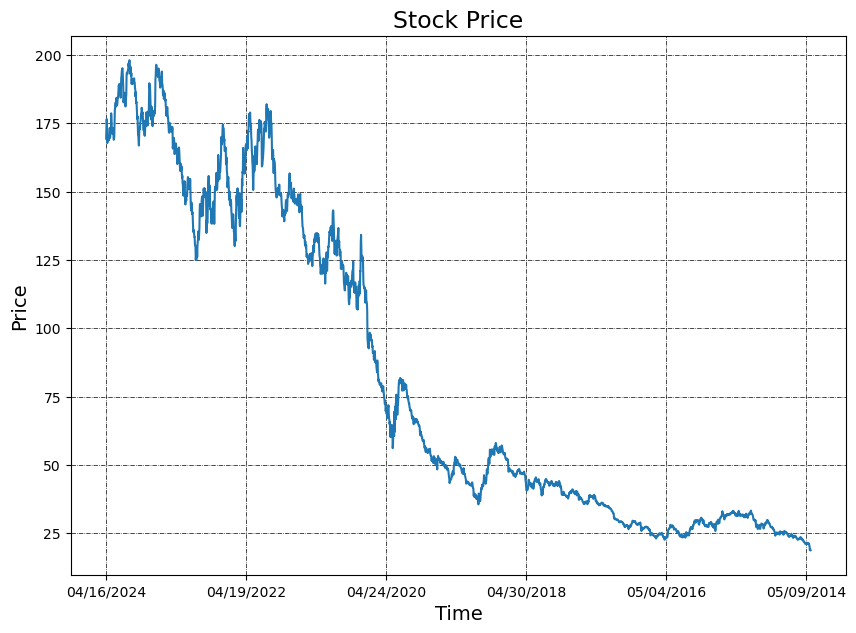

In [6]:
# Plot time series chart
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [7]:
def create_train_test_set(df_Stock, window_size=59):
    features = df_Stock.drop(columns=['Open'], axis=1)
    target = df_Stock['Open']
    
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    # Calculate the number of sequences that can be created
    num_sequences = data_len - window_size

    # Splitting features and target into train, validation, and test samples 
    X_sequences = [features[i:i+window_size] for i in range(num_sequences)]
    Y_sequences = [target[i+window_size] for i in range(num_sequences)]

    train_split = int(num_sequences * 0.88)
    val_split = train_split + int(num_sequences * 0.1)

    X_train, X_val, X_test = X_sequences[:train_split], X_sequences[train_split:val_split], X_sequences[val_split:]
    Y_train, Y_val, Y_test = Y_sequences[:train_split], Y_sequences[train_split:val_split], Y_sequences[val_split:]
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [8]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock, window_size=59)

Historical Stock Data length is -  2516


In [9]:
from sklearn.linear_model import LinearRegression

# Convert DataFrames to NumPy arrays and flatten them
X_train_flat = [np.array(seq).flatten() for seq in X_train]
X_val_flat = [np.array(seq).flatten() for seq in X_val]
X_test_flat = [np.array(seq).flatten() for seq in X_test]

model = LinearRegression()
model.fit(X_train_flat, Y_train)


LinearRegression()

In [10]:
# Predict on the validation set
Y_val_pred = model.predict(X_val_flat)

In [11]:
# Calculate validation RMSE
val_rmse = mean_squared_error(Y_val, Y_val_pred, squared=False)
print("Validation RMSE: ", val_rmse)

Validation RMSE:  0.6223622535375067


In [12]:
# Predict on the test set
Y_test_pred = model.predict(X_test_flat)

In [13]:
# Calculate test RMSE
test_rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)
print("Test RMSE:", test_rmse)

Test RMSE: 0.4208286210469516


In [14]:
# Print coefficients
print('LR Coefficients: \n', model.coef_)

# Print intercept
print('LR Intercept: \n', model.intercept_)


LR Coefficients: 
 [ 2.86080495e-02 -6.17807553e-10 -2.87538090e-02 -4.49158307e-02
  1.28909859e-01  8.45652731e-11 -6.98687541e-02 -4.04469165e-03
 -8.11771857e-02  6.57485670e-10  1.13212555e-02  2.67934529e-02
  1.67174487e-01  9.34034732e-10 -1.17363382e-01 -5.77149227e-04
  1.56581397e-02  1.66678130e-10 -4.87829414e-02  1.15740783e-02
 -9.73290105e-02 -1.44698104e-09  1.45469352e-01 -5.21988197e-02
 -4.96901087e-02 -1.07677867e-09  1.86420854e-01 -7.15710667e-02
 -1.47832986e-01  2.26662952e-10 -1.25450762e-02  1.00053375e-01
 -5.06048169e-03 -1.21444021e-10 -4.82814047e-02  1.10850685e-01
 -1.57118531e-01  4.79324879e-10  1.88535219e-02  5.96942583e-02
  1.90454421e-02  3.49472720e-10  1.12448302e-02 -2.47900281e-03
 -6.24760198e-02  8.17326849e-11 -5.89023442e-02  7.61113210e-02
  1.48727643e-01  2.13544835e-10  4.96692936e-02 -1.18746759e-01
 -2.44401080e-01 -1.21615047e-09  1.75848127e-01  6.71502871e-02
  1.33806130e-02  4.76607573e-11 -3.09093563e-02  2.92815671e-02
 -7.54

In [16]:
# Print performance on the training set
print("Performance on Training Set:", model.score(X_train_flat, Y_train))


Performance on Training Set: 0.9990097955617552


In [21]:
# Create a DataFrame to store actual and predicted values
df_pred = pd.DataFrame({'Actual': Y_val, 'Predicted': Y_val_pred}, index=df_Stock.index[-len(Y_val):])

# Reset index to have the 'Date' as a column
df_pred = df_pred.reset_index()

# Convert 'Date' column to datetime format
df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%m/%d/%Y')

df_pred_sorted = df_pred.sort_values(by='Date')

# Print the DataFrame
print(df_pred_sorted)


          Date   Actual  Predicted
244 2014-04-17  23.0250  23.242372
243 2014-04-21  23.3800  23.591695
242 2014-04-22  23.4662  23.291456
241 2014-04-23  23.4175  22.870384
240 2014-04-24  23.5350  23.669771
..         ...      ...        ...
4   2015-04-01  32.0463  31.889319
3   2015-04-02  31.5250  31.863138
2   2015-04-06  31.7575  31.548321
1   2015-04-07  31.9300  31.359464
0   2015-04-08  31.8075  31.051534

[245 rows x 3 columns]


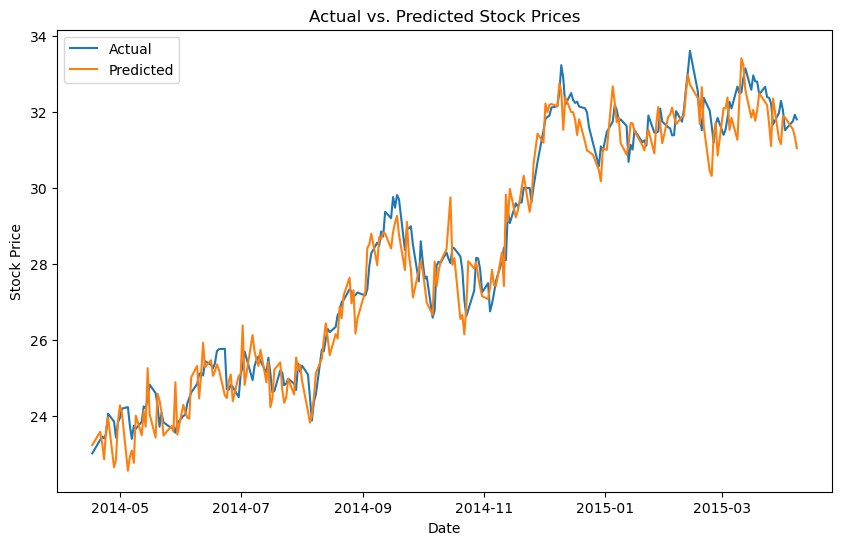

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_pred_sorted['Date'], df_pred_sorted['Actual'], label='Actual')
plt.plot(df_pred_sorted['Date'], df_pred_sorted['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()